Hand Written Digits Classification

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
np.random.seed(0)

In [47]:
#Loading Training and Testing Datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28."

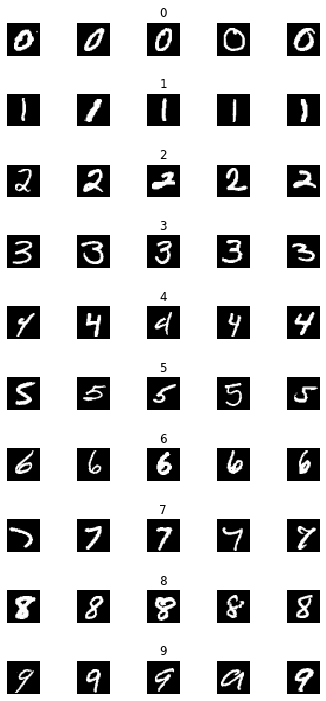

In [48]:
# Displaying a small set of training data
num_of_samples = []
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

Text(0, 0.5, 'NUmber of Images')

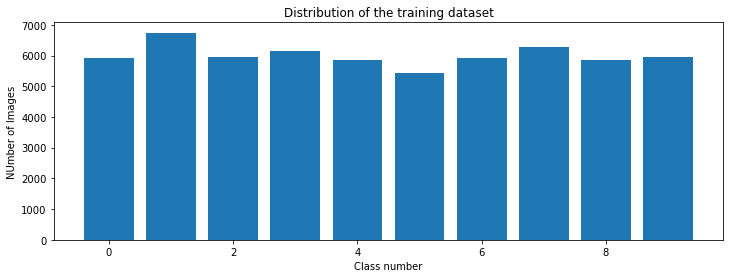

In [49]:
#PLotting the variety in the training dataset
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("NUmber of Images")

In [50]:
#one-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Normalizing the pixels from range of 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

#Converting 2D image to a 1D array to support matrix multiplication
num_pixels = 784
print("X_train.shape : ",X_train.shape)
print("X_test.shape :  ",X_test.shape)
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("X_train.shape : ",X_train.shape)
print("X_test.shape :  ",X_test.shape)

X_train.shape :  (60000, 28, 28)
X_test.shape :   (10000, 28, 28)
X_train.shape :  (60000, 784)
X_test.shape :   (10000, 784)


In [51]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [52]:
model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 6, batch_size = 200, verbose = 1, shuffle= 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 1s 25us/step - loss: 0.6044 - accuracy: 0.8140 - val_loss: 0.3147 - val_accuracy: 0.9045
Epoch 2/6
54000/54000 [==============================] - 1s 19us/step - loss: 0.3514 - accuracy: 0.8992 - val_loss: 0.2662 - val_accuracy: 0.9275
Epoch 3/6
54000/54000 [==============================] - 1s 19us/step - loss: 0.3052 - accuracy: 0.9119 - val_loss: 0.2470 - val_accuracy: 0.9255
Epoch 4/6
54000/54000 [==============================] - 1s 19us/step - loss: 0.2905 - accuracy: 0.9155 - val_loss: 0.2343 - val_accuracy: 0.9308
Epoch 5/6
54000/54000 [==============================] - 1s 19us/step - loss: 0.2756 - accuracy: 0.9193 - val_loss: 0.2320 - val_accuracy: 0.9293
Epoch 6/6
54000/54000 [==============================] - 1s 19us/step - loss: 0.2676 - accuracy: 0.9208 - val_loss: 0.2235 - val_accuracy: 0.9308


Text(0.5, 0, 'epoch')

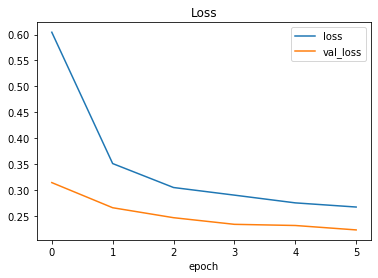

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

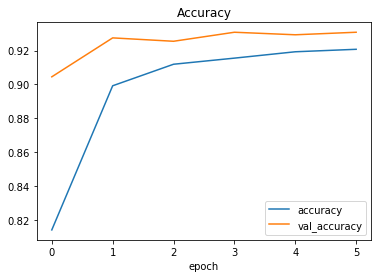

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [56]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score    : ',score[0])
print('Test accuracy : ',score[1])

Test score    :  0.28741463046371934
Test accuracy :  0.9126999974250793


<Response [200]>


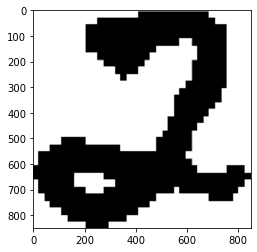

In [57]:
import requests
import cv2
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

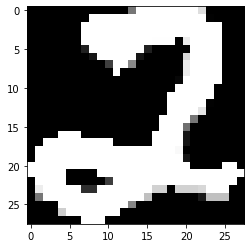

In [58]:
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [59]:
image = image/255
image = image.reshape(1, 784)

In [60]:
prediction = model.predict_classes(image)
print("predicted digit : ", str(prediction))

predicted digit :  [2]
